In [1]:
## import libraries
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [5]:
##
dir_data = "./datasets"

name_label = 'train-labels.tif'
name_input = 'train-volume.tif'

img_label = Image.open(os.path.join(dir_data, name_label))
img_input = Image.open(os.path.join(dir_data, name_input))

ny, nx = img_label.size
nframe = img_label.n_frames

print("프레임 수 :", nframe)
print(f"이미지의 크기 : {nx}x{ny}")

프레임 수 : 30
이미지의 크기 : 512x512


In [21]:
# training set, validation set, test set 나누어 저장하기

nframe_train =24 
nframe_val = 3
nframe_test = 3

dir_save_train = os.path.join(dir_data, "train")
dir_save_val = os.path.join(dir_data, "val")
dir_save_test = os.path.join(dir_data, "test")

if not os.path.exists(dir_save_train): # train data 디렉토리 구성
    os.makedirs(dir_save_train)
    
if not os.path.exists(dir_save_val): # val data 디렉토리 구성
    os.makedirs(dir_save_val)

if not os.path.exists(dir_save_test): # test data 디렉토리 구성
    os.makedirs(dir_save_test) 

In [22]:
## random 저장하기 , frame에 대하여 index 값이 랜덤하게 저장.

id_frame = np.arange(nframe)
np.random.shuffle(id_frame)

id_frame

array([ 0, 14, 16, 26, 11, 23, 24, 13,  7,  6, 18, 12,  9,  5, 20, 17, 21,
       29,  8, 19, 28,  4, 10,  2,  3, 25, 22, 27, 15,  1])

In [23]:
# training set 저장하는 구문

offset_nframe = 0 


for i in range(nframe_train):
    img_label.seek(id_frame[i + offset_nframe])
    img_input.seek(id_frame[i + offset_nframe])
    
    label_ = np.asarray(img_label)
    input_ = np.asarray(img_input)
    
    np.save(os.path.join(dir_save_train, 'label_%03d.npy' % i), label_)
    np.save(os.path.join(dir_save_train, 'input_%03d.npy' % i), label_)
    

In [24]:
# validation set 저장하는 구문

offset_nframe += nframe_train

for i in range(nframe_val):
    img_label.seek(id_frame[i + offset_nframe])
    img_input.seek(id_frame[i + offset_nframe])
    
    label_ = np.asarray(img_label)
    input_ = np.asarray(img_input)
    
    np.save(os.path.join(dir_save_val, 'label_%03d.npy' % i), label_)
    np.save(os.path.join(dir_save_val, 'input_%03d.npy' % i), label_)

In [25]:
# test set 저장하는 구문

offset_nframe += nframe_val
 
for i in range(nframe_test):
    img_label.seek(id_frame[i + offset_nframe])
    img_input.seek(id_frame[i + offset_nframe])
    
    label_ = np.asarray(img_label)
    input_ = np.asarray(img_input)
    
    np.save(os.path.join(dir_save_test, 'label_%03d.npy' % i), label_)
    np.save(os.path.join(dir_save_test, 'input_%03d.npy' % i), label_)

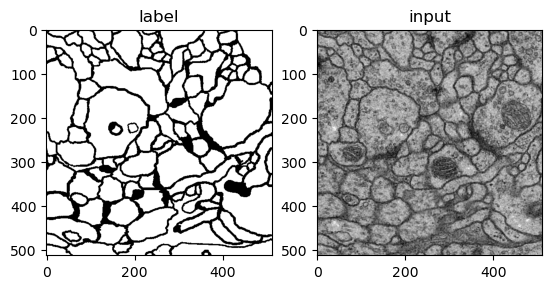

In [26]:
## 시각화 - 왼쪽 이미지는 오른쪽 이미지의 segmentation image 
## 왼쪽은 label: segmentation , 오른쪽은 input: Cell image

plt.subplot(121)
plt.imshow(label_, cmap='gray')
plt.title('label')

plt.subplot(122)
plt.imshow(input_, cmap='gray')
plt.title('input')

plt.show()